# 1. Importation des Bibliothèques

In [49]:
# Importation des bibliothèques nécessaires
import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk

# Assurez-vous que les ressources NLTK nécessaires sont téléchargées
nltk.download('punkt')
nltk.download('wordnet')

# Charger les données déjà prétraitées
data = pd.read_csv('../data/database_p7_rework.csv')

# Initialisation du scaler
scaler = StandardScaler(with_mean=False)  # `with_mean=False` est utilisé car les données sont sparse

data.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\trist\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,target,id,date,flag,user,text,year,month,word_count,hour,sentiment,text_cleaned,text_lemmatized,text_stemmed
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009,4,19,22,0.216667,switchfoot http twitpic com 2y1zl awww that s...,switchfoot http twitpic com 2y1zl awww that s ...,switchfoot http twitpic com 2y1zl awww that s ...
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,21,22,0.000000,is upset that he can t update his facebook by ...,is upset that he can t update his facebook by ...,is upset that he can t updat hi facebook by te...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009,4,18,22,0.500000,kenichan i dived many times for the ball mana...,kenichan i dived many time for the ball manage...,kenichan i dive mani time for the ball manag t...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,10,22,0.200000,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire,my whole bodi feel itchi and like it on fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009,4,21,22,-0.625000,nationwideclass no it s not behaving at all i...,nationwideclass no it s not behaving at all i ...,nationwideclass no it s not behav at all i m m...


# 2. Vectorisation et Séparation des Données

## 2.1 Lemmatisation + CountVectorizer

In [52]:
# Lemmatisation + CountVectorizer
count_vectorizer = CountVectorizer()
X_count_lemma = count_vectorizer.fit_transform(data['text_lemmatized'])
X_count_lemma = scaler.fit_transform(X_count_lemma)

# Séparation des données en ensemble d'entraînement et de test
X_train_count_lemma, X_test_count_lemma, y_train_lemma, y_test_lemma = train_test_split(X_count_lemma, data['target'], test_size=0.2, random_state=42)

# Vérification des formes des matrices
print(f"X_train_count_lemma shape: {X_train_count_lemma.shape}, X_test_count_lemma shape: {X_test_count_lemma.shape}")


X_train_count_lemma shape: (1278652, 672234), X_test_count_lemma shape: (319663, 672234)


## 2.2 Lemmatisation + TF-IDF

In [54]:
# Lemmatisation + TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_lemma = tfidf_vectorizer.fit_transform(data['text_lemmatized'])
X_tfidf_lemma = scaler.fit_transform(X_tfidf_lemma)

# Séparation des données en ensemble d'entraînement et de test
X_train_tfidf_lemma, X_test_tfidf_lemma, y_train_lemma, y_test_lemma = train_test_split(X_tfidf_lemma, data['target'], test_size=0.2, random_state=42)

# Vérification des formes des matrices
print(f"X_train_tfidf_lemma shape: {X_train_tfidf_lemma.shape}, X_test_tfidf_lemma shape: {X_test_tfidf_lemma.shape}")


X_train_tfidf_lemma shape: (1278652, 672234), X_test_tfidf_lemma shape: (319663, 672234)


## 2.3 Lemmatisation + CountVectorizer + TF-IDF

In [56]:
# Lemmatisation + CountVectorizer + TF-IDF
X_count_lemma = count_vectorizer.fit_transform(data['text_lemmatized'])

# Appliquer TF-IDF sur la matrice de CountVectorizer
tfidf_transformer = TfidfTransformer()
X_count_tfidf_lemma = tfidf_transformer.fit_transform(X_count_lemma)

# Standardisation des données vectorisées
X_count_tfidf_lemma = scaler.fit_transform(X_count_tfidf_lemma)

# Séparation des données en ensemble d'entraînement et de test
X_train_count_tfidf_lemma, X_test_count_tfidf_lemma, y_train_lemma, y_test_lemma = train_test_split(X_count_tfidf_lemma, data['target'], test_size=0.2, random_state=42)

# Vérification des formes des matrices
print(f"X_train_count_tfidf_lemma shape: {X_train_count_tfidf_lemma.shape}, X_test_count_tfidf_lemma shape: {X_test_count_tfidf_lemma.shape}")


X_train_count_tfidf_lemma shape: (1278652, 672234), X_test_count_tfidf_lemma shape: (319663, 672234)


## 2.4 Stemming + CountVectorizer

In [58]:
# Stemming + CountVectorizer
X_count_stem = count_vectorizer.fit_transform(data['text_stemmed'])
X_count_stem = scaler.fit_transform(X_count_stem)

# Séparation des données en ensemble d'entraînement et de test
X_train_count_stem, X_test_count_stem, y_train_stem, y_test_stem = train_test_split(X_count_stem, data['target'], test_size=0.2, random_state=42)

# Vérification des formes des matrices
print(f"X_train_count_stem shape: {X_train_count_stem.shape}, X_test_count_stem shape: {X_test_count_stem.shape}")


X_train_count_stem shape: (1278652, 634186), X_test_count_stem shape: (319663, 634186)


## 2.5 Stemming + TF-IDF

In [60]:
# Stemming + TF-IDF
X_tfidf_stem = tfidf_vectorizer.fit_transform(data['text_stemmed'])
X_tfidf_stem = scaler.fit_transform(X_tfidf_stem)

# Séparation des données en ensemble d'entraînement et de test
X_train_tfidf_stem, X_test_tfidf_stem, y_train_stem, y_test_stem = train_test_split(X_tfidf_stem, data['target'], test_size=0.2, random_state=42)

# Vérification des formes des matrices
print(f"X_train_tfidf_stem shape: {X_train_tfidf_stem.shape}, X_test_tfidf_stem shape: {X_test_tfidf_stem.shape}")


X_train_tfidf_stem shape: (1278652, 634186), X_test_tfidf_stem shape: (319663, 634186)


## 2.6 Stemming + CountVectorizer + TF-IDF

In [62]:
# Stemming + CountVectorizer + TF-IDF
X_count_stem = count_vectorizer.fit_transform(data['text_stemmed'])

# Appliquer TF-IDF sur la matrice de CountVectorizer
X_count_tfidf_stem = tfidf_transformer.fit_transform(X_count_stem)

# Standardisation des données vectorisées
X_count_tfidf_stem = scaler.fit_transform(X_count_tfidf_stem)

# Séparation des données en ensemble d'entraînement et de test
X_train_count_tfidf_stem, X_test_count_tfidf_stem, y_train_stem, y_test_stem = train_test_split(X_count_tfidf_stem, data['target'], test_size=0.2, random_state=42)

# Vérification des formes des matrices
print(f"X_train_count_tfidf_stem shape: {X_train_count_tfidf_stem.shape}, X_test_count_tfidf_stem shape: {X_test_count_tfidf_stem.shape}")


X_train_count_tfidf_stem shape: (1278652, 634186), X_test_count_tfidf_stem shape: (319663, 634186)


# 3. Entraînement des Modèles de Régression Logistique

## 3.1 Entraînement pour Lemmatisation + CountVectorizer

In [65]:
# Lemmatisation + CountVectorizer
with mlflow.start_run():
    mlflow.log_param("vectorizer", "CountVectorizer")
    mlflow.log_param("preprocessing", "Lemmatisation")
    mlflow.log_param("model_type", "LogisticRegression")
    
    model_count_lemma = LogisticRegression(max_iter=200)
    model_count_lemma.fit(X_train_count_lemma, y_train_lemma)
    
    y_pred_count_lemma = model_count_lemma.predict(X_test_count_lemma)
    accuracy_count_lemma = accuracy_score(y_test_lemma, y_pred_count_lemma)
    
    mlflow.log_metric("accuracy", accuracy_count_lemma)
    input_example_count_lemma = X_test_count_lemma[:1].toarray()
    mlflow.sklearn.log_model(model_count_lemma, "model_count_lemma", input_example=input_example_count_lemma)
    
    print(f"Accuracy for Lemmatisation + CountVectorizer: {accuracy_count_lemma}")
    print(classification_report(y_test_lemma, y_pred_count_lemma))


D:\Master_Openclassroom\python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Lemmatisation + CountVectorizer: 0.7573913777947401
              precision    recall  f1-score   support

           0       0.75      0.77      0.76    159435
           4       0.76      0.75      0.76    160228

    accuracy                           0.76    319663
   macro avg       0.76      0.76      0.76    319663
weighted avg       0.76      0.76      0.76    319663



## 3.2 Entraînement pour Lemmatisation + TF-IDF

In [67]:
# Lemmatisation + TF-IDF
with mlflow.start_run():
    mlflow.log_param("vectorizer", "TF-IDF")
    mlflow.log_param("preprocessing", "Lemmatisation")
    mlflow.log_param("model_type", "LogisticRegression")
    
    model_tfidf_lemma = LogisticRegression(max_iter=200)
    model_tfidf_lemma.fit(X_train_tfidf_lemma, y_train_lemma)
    
    y_pred_tfidf_lemma = model_tfidf_lemma.predict(X_test_tfidf_lemma)
    accuracy_tfidf_lemma = accuracy_score(y_test_lemma, y_pred_tfidf_lemma)
    
    mlflow.log_metric("accuracy", accuracy_tfidf_lemma)
    input_example_tfidf_lemma = X_test_tfidf_lemma[:1].toarray()
    mlflow.sklearn.log_model(model_tfidf_lemma, "model_tfidf_lemma", input_example=input_example_tfidf_lemma)
    
    print(f"Accuracy for Lemmatisation + TF-IDF: {accuracy_tfidf_lemma}")
    print(classification_report(y_test_lemma, y_pred_tfidf_lemma))


D:\Master_Openclassroom\python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Lemmatisation + TF-IDF: 0.7573194270215821
              precision    recall  f1-score   support

           0       0.76      0.76      0.76    159435
           4       0.76      0.76      0.76    160228

    accuracy                           0.76    319663
   macro avg       0.76      0.76      0.76    319663
weighted avg       0.76      0.76      0.76    319663



## 3.3 Entraînement pour Lemmatisation + CountVectorizer + TF-IDF

In [69]:
# Lemmatisation + CountVectorizer + TF-IDF
with mlflow.start_run():
    mlflow.log_param("vectorizer", "CountVectorizer + TF-IDF")
    mlflow.log_param("preprocessing", "Lemmatisation")
    mlflow.log_param("model_type", "LogisticRegression")
    
    model_count_tfidf_lemma = LogisticRegression(max_iter=200)
    model_count_tfidf_lemma.fit(X_train_count_tfidf_lemma, y_train_lemma)
    
    y_pred_count_tfidf_lemma = model_count_tfidf_lemma.predict(X_test_count_tfidf_lemma)
    accuracy_count_tfidf_lemma = accuracy_score(y_test_lemma, y_pred_count_tfidf_lemma)
    
    mlflow.log_metric("accuracy", accuracy_count_tfidf_lemma)
    input_example_count_tfidf_lemma = X_test_count_tfidf_lemma[:1].toarray()
    mlflow.sklearn.log_model(model_count_tfidf_lemma, "model_count_tfidf_lemma", input_example=input_example_count_tfidf_lemma)
    
    print(f"Accuracy for Lemmatisation + CountVectorizer + TF-IDF: {accuracy_count_tfidf_lemma}")
    print(classification_report(y_test_lemma, y_pred_count_tfidf_lemma))


D:\Master_Openclassroom\python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Lemmatisation + CountVectorizer + TF-IDF: 0.7573006572546713
              precision    recall  f1-score   support

           0       0.76      0.76      0.76    159435
           4       0.76      0.76      0.76    160228

    accuracy                           0.76    319663
   macro avg       0.76      0.76      0.76    319663
weighted avg       0.76      0.76      0.76    319663



## 3.4 Entraînement pour Stemming + CountVectorizer

In [71]:
# Stemming + CountVectorizer
with mlflow.start_run():
    mlflow.log_param("vectorizer", "CountVectorizer")
    mlflow.log_param("preprocessing", "Stemming")
    mlflow.log_param("model_type", "LogisticRegression")
    
    model_count_stem = LogisticRegression(max_iter=200)
    model_count_stem.fit(X_train_count_stem, y_train_stem)
    
    y_pred_count_stem = model_count_stem.predict(X_test_count_stem)
    accuracy_count_stem = accuracy_score(y_test_stem, y_pred_count_stem)
    
    mlflow.log_metric("accuracy", accuracy_count_stem)
    input_example_count_stem = X_test_count_stem[:1].toarray()
    mlflow.sklearn.log_model(model_count_stem, "model_count_stem", input_example=input_example_count_stem)
    
    print(f"Accuracy for Stemming + CountVectorizer: {accuracy_count_stem}")
    print(classification_report(y_test_stem, y_pred_count_stem))


D:\Master_Openclassroom\python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Stemming + CountVectorizer: 0.7574914832182642
              precision    recall  f1-score   support

           0       0.75      0.77      0.76    159435
           4       0.76      0.75      0.76    160228

    accuracy                           0.76    319663
   macro avg       0.76      0.76      0.76    319663
weighted avg       0.76      0.76      0.76    319663



## 3.5 Entraînement pour Stemming + TF-IDF

In [73]:
# Stemming + TF-IDF
with mlflow.start_run():
    mlflow.log_param("vectorizer", "TF-IDF")
    mlflow.log_param("preprocessing", "Stemming")
    mlflow.log_param("model_type", "LogisticRegression")
    
    model_tfidf_stem = LogisticRegression(max_iter=200)
    model_tfidf_stem.fit(X_train_tfidf_stem, y_train_stem)
    
    y_pred_tfidf_stem = model_tfidf_stem.predict(X_test_tfidf_stem)
    accuracy_tfidf_stem = accuracy_score(y_test_stem, y_pred_tfidf_stem)
    
    mlflow.log_metric("accuracy", accuracy_tfidf_stem)
    input_example_tfidf_stem = X_test_tfidf_stem[:1].toarray()
    mlflow.sklearn.log_model(model_tfidf_stem, "model_tfidf_stem", input_example=input_example_tfidf_stem)
    
    print(f"Accuracy for Stemming + TF-IDF: {accuracy_tfidf_stem}")
    print(classification_report(y_test_stem, y_pred_tfidf_stem))


D:\Master_Openclassroom\python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Stemming + TF-IDF: 0.7581578099435968
              precision    recall  f1-score   support

           0       0.76      0.76      0.76    159435
           4       0.76      0.76      0.76    160228

    accuracy                           0.76    319663
   macro avg       0.76      0.76      0.76    319663
weighted avg       0.76      0.76      0.76    319663



## 3.6 Entraînement pour Stemming + CountVectorizer + TF-IDF

In [75]:
# Stemming + CountVectorizer + TF-IDF
with mlflow.start_run():
    mlflow.log_param("vectorizer", "CountVectorizer + TF-IDF")
    mlflow.log_param("preprocessing", "Stemming")
    mlflow.log_param("model_type", "LogisticRegression")
    
    model_count_tfidf_stem = LogisticRegression(max_iter=200)
    model_count_tfidf_stem.fit(X_train_count_tfidf_stem, y_train_stem)
    
    y_pred_count_tfidf_stem = model_count_tfidf_stem.predict(X_test_count_tfidf_stem)
    accuracy_count_tfidf_stem = accuracy_score(y_test_stem, y_pred_count_tfidf_stem)
    
    mlflow.log_metric("accuracy", accuracy_count_tfidf_stem)
    input_example_count_tfidf_stem = X_test_count_tfidf_stem[:1].toarray()
    mlflow.sklearn.log_model(model_count_tfidf_stem, "model_count_tfidf_stem", input_example=input_example_count_tfidf_stem)
    
    print(f"Accuracy for Stemming + CountVectorizer + TF-IDF: {accuracy_count_tfidf_stem}")
    print(classification_report(y_test_stem, y_pred_count_tfidf_stem))


D:\Master_Openclassroom\python\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Stemming + CountVectorizer + TF-IDF: 0.7581703231215373
              precision    recall  f1-score   support

           0       0.76      0.76      0.76    159435
           4       0.76      0.76      0.76    160228

    accuracy                           0.76    319663
   macro avg       0.76      0.76      0.76    319663
weighted avg       0.76      0.76      0.76    319663



# 4. Analyse des Résultats

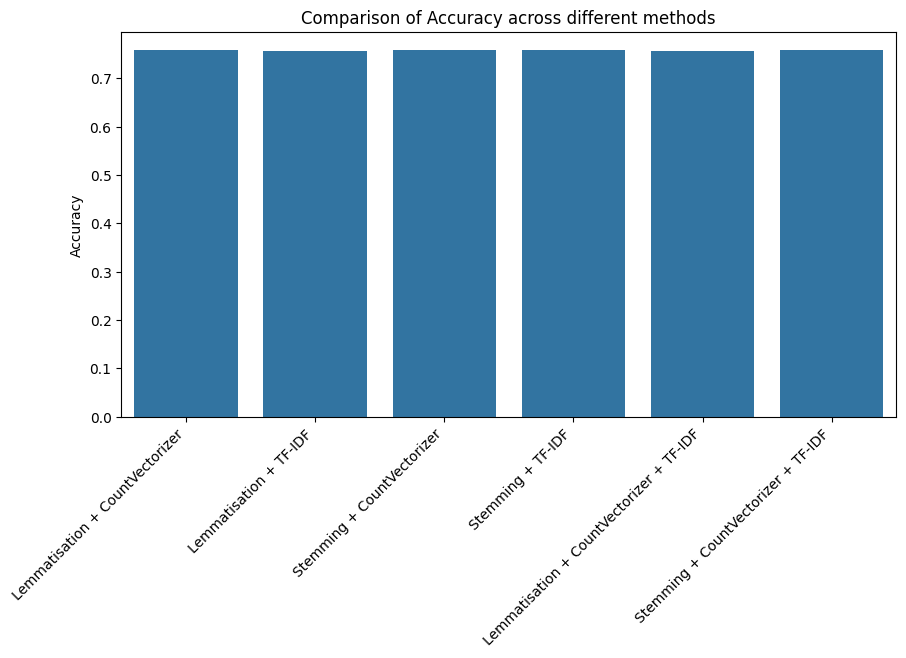

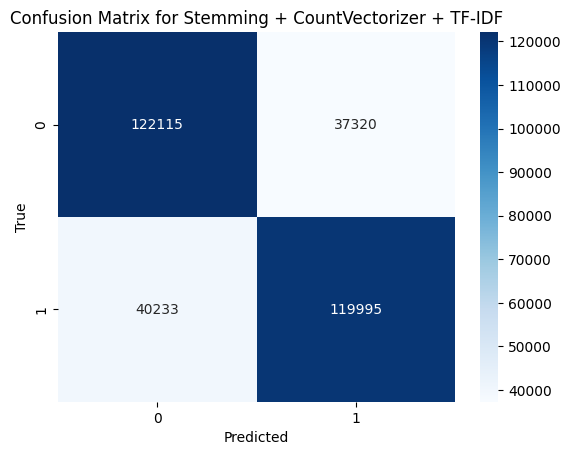

In [77]:
# Comparer les accuracies
accuracies = {
    'Lemmatisation + CountVectorizer': accuracy_count_lemma,
    'Lemmatisation + TF-IDF': accuracy_tfidf_lemma,
    'Stemming + CountVectorizer': accuracy_count_stem,
    'Stemming + TF-IDF': accuracy_tfidf_stem,
    'Lemmatisation + CountVectorizer + TF-IDF': accuracy_count_tfidf_lemma,
    'Stemming + CountVectorizer + TF-IDF': accuracy_count_tfidf_stem
}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Comparison of Accuracy across different methods')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.show()

# Matrice de confusion pour le meilleur modèle
best_model_name = max(accuracies, key=accuracies.get)  # Par exemple
y_true = y_test_lemma if 'Lemmatisation' in best_model_name else y_test_stem
y_pred = y_pred_count_lemma if 'CountVectorizer' in best_model_name else y_pred_tfidf_lemma  # Adaptez selon le meilleur modèle

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [78]:
import os
import joblib

# Déterminez le meilleur modèle basé sur les accuracies
best_model_name = max(accuracies, key=accuracies.get)

# Selon le meilleur modèle, sélectionnez l'objet modèle correspondant
if best_model_name == 'Lemmatisation + CountVectorizer':
    best_model = model_count_lemma
elif best_model_name == 'Lemmatisation + TF-IDF':
    best_model = model_tfidf_lemma
elif best_model_name == 'Stemming + CountVectorizer':
    best_model = model_count_stem
elif best_model_name == 'Stemming + TF-IDF':
    best_model = model_tfidf_stem
elif best_model_name == 'Lemmatisation + CountVectorizer + TF-IDF':
    best_model = model_count_tfidf_lemma
elif best_model_name == 'Stemming + CountVectorizer + TF-IDF':
    best_model = model_count_tfidf_stem

# Créez le chemin vers le dossier 'models'
models_folder_path = os.path.join('..', 'models')

# Créez le dossier 'models' s'il n'existe pas
if not os.path.exists(models_folder_path):
    os.makedirs(models_folder_path)

# Sauvegardez le modèle dans le dossier 'models'
model_file_name = f"{best_model_name.replace(' ', '_').replace('+', 'plus')}_model.pkl"
model_path = os.path.join(models_folder_path, model_file_name)
joblib.dump(best_model, model_path)

print(f"Best model '{best_model_name}' saved at {model_path}")

Best model 'Stemming + CountVectorizer + TF-IDF' saved at ..\models\Stemming_plus_CountVectorizer_plus_TF-IDF_model.pkl
